<center><h1> Autoencoder on the MNIST dataset </h1></center>


<center> Keras functional API </center>

# Import

In [2]:
### General Imports ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Autoencoder ###
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input

from tensorflow.keras.datasets import mnist


# Load data

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
shape_x = 28
shape_y = 28

In [9]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [11]:
X_train = X_train.reshape(-1,shape_x,shape_y,1)
X_test = X_test.reshape(-1,shape_x,shape_y,1)

# Build the model

In [16]:
input_img = Input(shape=(shape_x, shape_y, 1))

# Ecoding
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1,(3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)
 
# Decoding
x = Conv2D(1,(3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1,(3, 3), padding='same')(x)

decoded = Activation('linear')(x)

In [17]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 1)         145       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 1)           10        
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 1)         0         
__________

In [18]:
autoencoder.fit(X_train, X_train, nb_epoch = 15, batch_size = 64, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 43s 787us/step - loss: 0.0864 - val_loss: 0.0849
Epoch 2/15
54000/54000 [==============================] - 46s 858us/step - loss: 0.0716 - val_loss: 0.0452
Epoch 3/15
54000/54000 [==============================] - 51s 946us/step - loss: 0.0392 - val_loss: 0.0368
Epoch 4/15
54000/54000 [==============================] - 50s 930us/step - loss: 0.0337 - val_loss: 0.0324
Epoch 5/15
54000/54000 [==============================] - 44s 808us/step - loss: 0.0319 - val_loss: 0.0320
Epoch 6/15
54000/54000 [==============================] - 48s 892us/step - loss: 0.0313 - val_loss: 0.0315
Epoch 7/15
54000/54000 [==============================] - 47s 873us/step - loss: 0.0307 - val_loss: 0.0320
Epoch 8/15
54000/54000 [==============================] - 53s 983us/step - loss: 0.0305 - val_loss: 0.0318
Epoch 9/15
54000/54000 [==============================] - 42s 785us/step - loss: 0.0303 - val_l

In [19]:
encoder = Model(inputs = input_img, outputs = encoded)

# Visualize the output

In [33]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

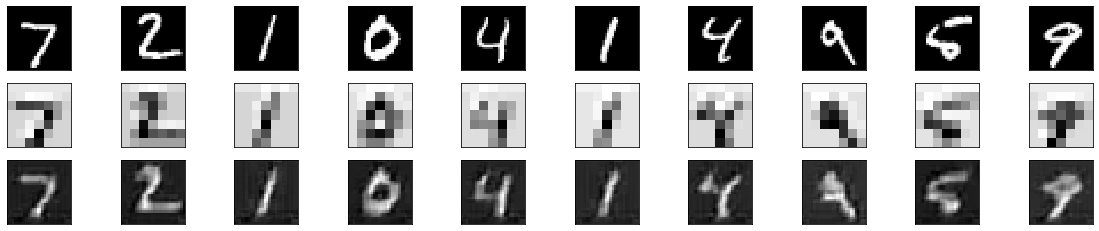

In [39]:
n = 10  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()